In [17]:
# Horray libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.linear_model import LogisticRegression

In [3]:
'''data_dir = tf.keras.utils.get_file('touch_photos', origin=google_path, untar=True)
data_dir = pathlib.Path(data_dir)'''

"data_dir = tf.keras.utils.get_file('touch_photos', origin=google_path, untar=True)\ndata_dir = pathlib.Path(data_dir)"

In [4]:
# Load data from csv
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Unpack dataframe to list
image = train_df['image'].tolist()
label = train_df['label'].tolist()
train_list = []
train_list.append(image)
train_list.append(label)

image = test_df['image'].tolist()
label = test_df['label'].tolist()
test_list = []
test_list.append(image)
test_list.append(label)

In [58]:
# Train Test Split
X_train, y_train = train_list
X_test, y_test = test_list

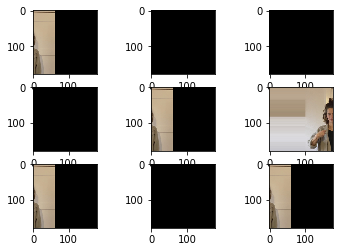

In [47]:
# horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = load_img('_data/_bylabel/_train/0/vlcsnap-2020-12-04-17h06m03s528.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[100,800])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()


In [5]:
# Transfer learning using Tensorflow

In [13]:
train_dir = '_data/_bylabel/_train'
BATCH_SIZE = 32
IMG_SIZE = (180, 180)

train_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 3336 files belonging to 2 classes.


In [22]:
validation_dir = '_data/_bylabel/_test'
BATCH_SIZE = 32
IMG_SIZE = (180, 180)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 492 files belonging to 2 classes.


In [64]:
#?????
class_names = train_df.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_list.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

AttributeError: 'list' object has no attribute 'take'

<Figure size 720x720 with 0 Axes>

In [66]:
# PROTOTYPE for Processing
train = tf.keras.preprocessing.image_dataset_from_directory(
    '_data/_bylabel/_train', 
    batch_size=32, 
    image_size=(180, 180), 
    shuffle=True, 
    validation_split=None,
)
test = tf.keras.preprocessing.image_dataset_from_directory(
    '_data/_bylabel/_test', 
    batch_size=32, 
    image_size=(180, 180), 
    shuffle=False, 
    validation_split=None,
)
model.fit(
  train,
  epochs=10
)
test_preds = model.predict(test)
# test_preds.to_csv(ideally with image names, definately with the actual labels)
train_preds = model.predict(train)
# train_preds.to_csv(ideally with image names, definately with the actual labels)

Found 3345 files belonging to 2 classes.
Found 495 files belonging to 2 classes.
Epoch 1/10
105/105 [==============================] - 23s 218ms/step - loss: 0.3133 - accuracy: 1.0000
Epoch 2/10
105/105 [==============================] - 23s 220ms/step - loss: 0.3133 - accuracy: 1.0000
Epoch 3/10
105/105 [==============================] - 23s 219ms/step - loss: 0.3133 - accuracy: 1.0000
Epoch 4/10
105/105 [==============================] - 23s 220ms/step - loss: 0.3133 - accuracy: 1.0000
Epoch 5/10
105/105 [==============================] - 23s 219ms/step - loss: 0.3133 - accuracy: 1.0000
Epoch 6/10
105/105 [==============================] - 23s 219ms/step - loss: 0.3133 - accuracy: 1.0000
Epoch 7/10
105/105 [==============================] - 23s 219ms/step - loss: 0.3133 - accuracy: 1.0000
Epoch 8/10
105/105 [==============================] - 23s 220ms/step - loss: 0.3133 - accuracy: 1.0000
Epoch 9/10
105/105 [==============================] - 23s 223ms/step - loss: 0.3133 - accuracy:

In [76]:
np.savetxt('test_preds.csv', test_preds, delimiter=",")
np.savetxt('train_preds.csv', train_preds, delimiter=",")
test_preds[0]

array([1.0000000e+00, 7.9365636e-10], dtype=float32)

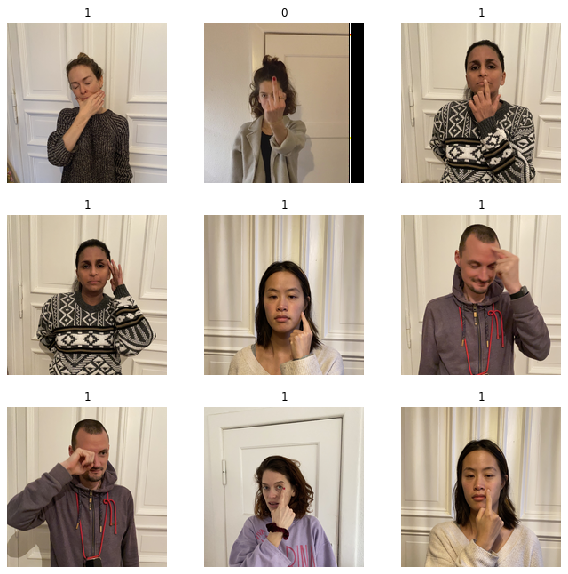

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Image classification using TensorFlow

In [25]:
batch_size = 32
img_height = 180
img_width = 180

In [26]:
path = '_data/_bylabel/_train'
data_dir = path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3336 files belonging to 2 classes.
Using 2669 files for training.


In [27]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3336 files belonging to 2 classes.
Using 667 files for validation.


In [28]:
class_names = train_ds.class_names
print(class_names)

['0', '1']


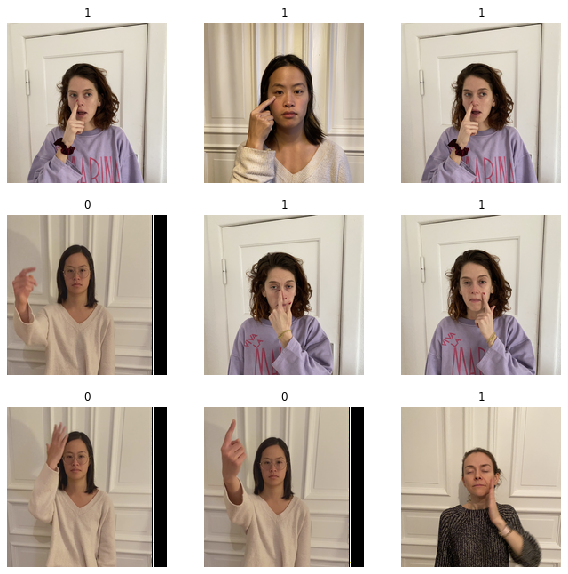

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [32]:
# Model building
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes),
  layers.Softmax(axis=-1)
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)        0

In [35]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
84/84 [==============================] - 20s 233ms/step - loss: 0.3419 - accuracy: 0.9715 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 2/10
84/84 [==============================] - 20s 235ms/step - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 3/10
84/84 [==============================] - 21s 245ms/step - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 4/10
84/84 [==============================] - 21s 249ms/step - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 5/10
84/84 [==============================] - 21s 246ms/step - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 6/10
84/84 [==============================] - 20s 237ms/step - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 7/10
84/84 [==============================] - 20s 236ms/step - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000

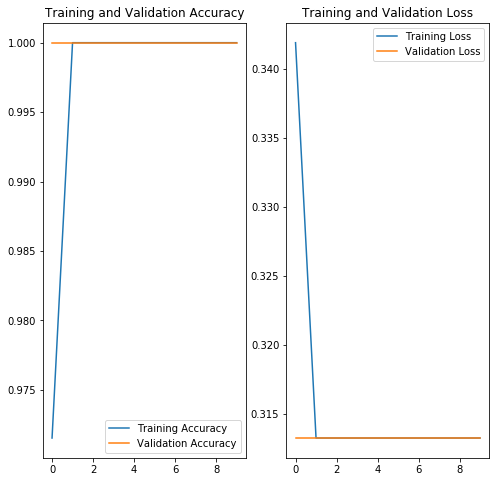

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
validation_dataset = train

val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

AttributeError: 'DataFrame' object has no attribute '_variant_tensor'

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)